<a href="https://colab.research.google.com/github/ricardofradeb/sistema_de_recomendacao_spotify/blob/main/sistema_recomendacao_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final de Ciência de Dados  

Nome: Ricardo Frade Brandão  
Matrícula: 164450006  
Curso: Engenharia Mecatrônica

#Sistema de recomendação de músicas de um Dataset Retirado da API do Spotify

Este trabalho tem como base dois artigos principais, sendo um desses o da Sandra encontrado em: https://datascientistdiary.com/index.php/2021/03/04/how-to-use-spotify-api-and-what-data-science-opportunities-can-it-open-up/ postado no *Data Scientist Diary* e do Nik Linnane encontrado em: https://medium.com/mlearning-ai/spotify-playlists-data-science-69b05e628bb9 postado no *Medium*.


Também utiliza-se de referência secundária o artigo do Eric https://github.com/enjuichang/PracticalDataScience-ENCA/tree/main/notebooks postado no *Github*.


Utiliza-se o dataset disponibilizado no Github https://github.com/diyaacharya/Spotify-Music-Recommendation-system/blob/main/DATA/cleaned_data_spotify.csv pelo usuário Sam Shadwell https://github.com/diyaacharya, que tem os dados de obtidos a partir da API do Spotify. Tem-se como referência esse dataset pois o mesmo nos dá informações que podem ser utilizadas para a implementação de um sistema de recomendação.


Além disso, também utiliza-se a playlist Top Brasil disponível em: https://open.spotify.com/playlist/37i9dQZF1DX0FOF1IUWK1W.


In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import time 
import datetime
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

from sklearn.pipeline import Pipeline
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/diyaacharya/Spotify-Music-Recommendation-system/main/DATA/cleaned_data_spotify.csv'
res = requests.get(url, allow_redirects=True)
with open('cleaned_data_spotify_final.csv','wb') as file:
    file.write(res.content)
sales_team = pd.read_csv('cleaned_data_spotify_final.csv')

In [ ]:
song_df=pd.read_csv("cleaned_data_spotify_final.csv")
song_df.drop('Unnamed: 0',axis=1,inplace=True)


In [ ]:

client_id = '7573e000a6a54da2acaef0edd94a3236'
client_secret ='632231db7c1244c88614a03b231691fa'


client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [ ]:
song_df

,valence,acousticness,artists,danceability,energy,instrumentalness,key,liveness,name,popularity,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s
0,0.688,0.33500,Olivia Rodrigo,0.563,0.664,0.000000,9,0.0849,good 4 u,1.000000,...,0,0,0,0,0,0,0,0,0,1
1,0.758,0.29700,Lil Nas X,0.610,0.508,0.000000,8,0.3840,MONTERO (Call Me By Your Name),0.954545,...,0,0,0,0,0,0,0,0,0,1
2,0.483,0.01370,MOMO Soundz,0.766,0.718,0.003530,11,0.1150,Down,0.022727,...,0,0,0,0,0,0,0,0,0,1
3,0.742,0.23500,Doja Cat,0.762,0.701,0.000158,8,0.1230,Kiss Me More (feat. SZA),0.931818,...,0,0,0,0,0,0,0,0,0,1
4,0.589,0.12700,Måneskin,0.714,0.800,0.000000,11,0.3590,Beggin',0.954545,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25093,0.608,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,0.808,0.000289,7,0.0822,China,0.363636,...,0,0,0,0,0,0,0,0,0,1
25094,0.734,0.20600,['Ashnikko'],0.717,0.753,0.000000,7,0.1010,Halloweenie III: Seven Days,0.272727,...,0,0,0,0,0,0,0,0,0,1
25095,0.637,0.10100,['MAMAMOO'],0.634,0.858,0.000009,4,0.2580,AYA,0.454545,...,0,0,0,0,0,0,0,0,0,1
25096,0.195,0.00998,['Eminem'],0.671,0.623,0.000008,2,0.6430,Darkness,0.318182,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
song_df.isnull().sum()


valence             0
acousticness        0
artists             0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
name                0
popularity          0
speechiness         0
duration_ms         0
loudness            0
tempo               0
year                0
A Minor             0
Ab Major            0
Ab Minor            0
B Major             0
B Minor             0
Bb Major            0
Bb Minor            0
C Major             0
C Minor             0
D Major             0
D Minor             0
Db Major            0
Db Minor            0
E Major             0
E Minor             0
Eb Major            0
Eb Minor            0
F Major             0
F Minor             0
F# Major            0
F# Minor            0
G Major             0
G Minor             0
1930s               0
1940s               0
1950s               0
1960s               0
1970s               0
1980s               0
1990s               0
2000s     

##O primeiro passo é realizar a conexão com a API do Spotify

In [ ]:

ids = []
def getTrackIDs(playlist_id):
    
    try:
        playlist = spotify.playlist(playlist_id)
    
        for item in playlist['tracks']['items']:
            track = item['track']
            if track is not None:
                ids.append(track['id'])
        return ids
    except:
        print("Entered a invalid a link")
        pass

In [ ]:
def getTrackFeatures(id_s):
    
    
   
    
    meta = spotify.track(id_s)
        # meta
    name = meta['name']

    artists = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    duration_ms = meta['duration_ms']
    popularity = meta['popularity']
    explicit=meta['explicit']
    features = spotify.audio_features(tracks=id_s)
    tempo=features[0]['tempo']
    valence=features[0]['valence']
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    mode=features[0]['mode']
    key=features[0]['key']
    import datetime

    track = [valence, acousticness,artists,danceability,duration_ms,energy,explicit,id_s,instrumentalness,loudness,key,liveness,mode,name,popularity,release_date,speechiness,tempo]
    return track


tracks=[]
def get_playlist_df():

    ids = getTrackIDs(input("Enter a link to your playlist "))
    for i in range(len(ids)):
        time.sleep(.5)
        track = getTrackFeatures(ids[i])
        tracks.append(track)  
        


    playlist_df = pd.DataFrame(tracks, columns =  ["valence","acousticness","artists","danceability","duration_ms","energy","explicit","id","instrumentalness","loudness","key","liveness","mode","name","popularity","release_date","speechiness","tempo"])
    playlist_df['year'] = pd.DatetimeIndex(playlist_df['release_date']).year
    year =playlist_df['year']
    playlist_df.drop(labels=['year'], axis=1, inplace = True)
    playlist_df.insert(2, 'year', year)    
    return playlist_df


Agora se deve entrar com o código da playlist que deseja fazer a comparação, nesse caso a playlist selecionada é a Top Brasil, na qual tem como código: 37i9dQZF1DX0FOF1IUWK1W

In [ ]:
playlist_df=get_playlist_df()


Enter a link to your playlist 37i9dQZF1DX0FOF1IUWK1W


In [ ]:
playlist_df[['name','artists','valence', 'acousticness', 'instrumentalness', 'energy']]

,name,artists,valence,acousticness,instrumentalness,energy
0,Roça Em Mim,Zé Felipe,0.762,0.2220,0.000000,0.810
1,Eu Gosto Assim - Ao Vivo,Gustavo Mioto,0.610,0.1490,0.000000,0.909
2,Evoque Prata,MC MENOR HR,0.520,0.3060,0.000000,0.519
3,Bombonzinho - Ao Vivo,Israel & Rodolffo,0.722,0.3050,0.000000,0.947
4,Felina,WIU,0.533,0.3850,0.000000,0.662
5,Sereia,Various Artists,0.505,0.2760,0.000000,0.661
6,Pactos - Ao Vivo,Matheus & Kauan,0.473,0.5820,0.000000,0.889
7,Haja Colírio (feat. Hugo & Guilherme) - Ao Vivo,Guilherme & Benuto,0.698,0.5900,0.000000,0.748
8,Ex dos Meus Sonhos - Ao Vivo,Gusttavo Lima,0.607,0.5540,0.000000,0.748
9,Comunicação Falhou - Ao Vivo,Mari Fernandez,0.793,0.4160,0.000000,0.882


In [ ]:
playlist_df.to_csv("playlist.csv")

### Decisão de quais colunas incluir:
>Valence: define o clima de uma música (por exemplo, feliz, alegre, eufórico, triste, deprimido, zangado).

>Danceability: Quão adequada é a faixa para dançar a faixa é para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral.

>Instrumentalness: Este valor representa a quantidade de vocais na música. Quanto mais próximo de 1,0, mais instrumental é a música.

>Energy: mede de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala. Os recursos perceptivos que contribuem para esse atributo incluem faixa dinâmica, sonoridade percebida, timbre, taxa de início e entropia geral.


Essas caracteristicas parecem diferenciar cada música da outra, então os consideramos para agrupar nosso modelo.

In [ ]:
columns_cluster = ['valence', 'acousticness','instrumentalness','energy']

##Padronizando o dataset:
>A padronização é feita utilizando o método minmax

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()

songs_scaled = ss.fit_transform(song_df[columns_cluster])


playlist_scaled = ss.fit_transform(playlist_df[columns_cluster])


In [ ]:
columns_to_cluster_scaled = [ 'valence_scaled','acousticness_scaled',"instrunentalness_scaled",'energy_scaled']

df_songs_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)
df_playlist_scaled = pd.DataFrame(playlist_scaled, columns=columns_to_cluster_scaled)
df_song_scaled_f=pd.concat([df_songs_scaled,song_df[['name','artists']]],axis=1)
df_playlist_scaled_f=pd.concat([df_playlist_scaled,playlist_df[['name','artists']]],axis=1)


In [ ]:
df_songs_scaled.isnull().sum()


valence_scaled             0
acousticness_scaled        0
instrunentalness_scaled    0
energy_scaled              0
dtype: int64

## Agrupando o dataset:
>Verificação de qual valor de agrupamento (*cluster*) escolher.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
n_clusters = range(2,12)
ssd = []
sc = []


for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=500, n_init=10, init='k-means++', random_state=42)
    km.fit(songs_scaled)
    preds = km.predict(songs_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(songs_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.4029394004419119
Number of Clusters = 3, Silhouette Score = 0.37875318762394367
Number of Clusters = 4, Silhouette Score = 0.325631269049152
Number of Clusters = 5, Silhouette Score = 0.3105307756528077
Number of Clusters = 6, Silhouette Score = 0.31961384882002775
Number of Clusters = 7, Silhouette Score = 0.3016105744203702
Number of Clusters = 8, Silhouette Score = 0.2930973065190259
Number of Clusters = 9, Silhouette Score = 0.2849312887354422
Number of Clusters = 10, Silhouette Score = 0.2661952180110341
Number of Clusters = 11, Silhouette Score = 0.2705421509608809


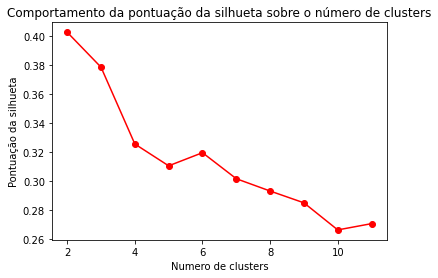

In [ ]:
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Numero de clusters')
plt.ylabel('Pontuação da silhueta')
plt.title('Comportamento da pontuação da silhueta sobre o número de clusters')
plt.show()

In [ ]:
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))


Number of Clusters = 2, Sum of Squared Distances = 66837.7645518051
Number of Clusters = 3, Sum of Squared Distances = 48351.54173575537
Number of Clusters = 4, Sum of Squared Distances = 36734.01325627898
Number of Clusters = 5, Sum of Squared Distances = 31906.99877253343
Number of Clusters = 6, Sum of Squared Distances = 27415.136788290347
Number of Clusters = 7, Sum of Squared Distances = 23753.184577394153
Number of Clusters = 8, Sum of Squared Distances = 21699.609619983265
Number of Clusters = 9, Sum of Squared Distances = 20109.058810490296
Number of Clusters = 10, Sum of Squared Distances = 18928.649919141826
Number of Clusters = 11, Sum of Squared Distances = 17764.39734237964


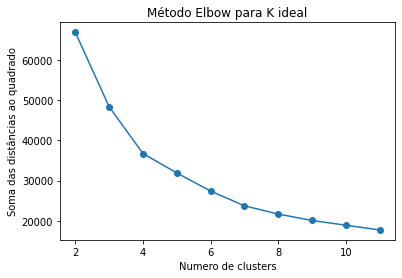

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Numero de clusters')
plt.ylabel('Soma das distâncias ao quadrado')
plt.title('Método Elbow para K ideal')
plt.show()


In [ ]:
k=6

model = KMeans(n_clusters=k, random_state=42).fit(songs_scaled)
pred = model.predict(songs_scaled)
print('10 primeiros clusters: ', model.labels_[:10])


10 primeiros clusters:  [1 1 0 4 4 4 0 1 4 4]


In [ ]:
model_playlist=KMeans(n_clusters=k, random_state=42).fit(playlist_scaled)
pred_playlist = model.predict(playlist_scaled)


##Número de músicas por clusters

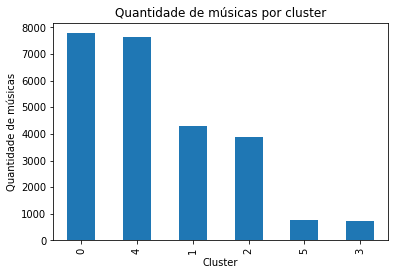

In [ ]:
df_songs_scaled['cluster'] = model.labels_

df_songs_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de músicas')
plt.title('Quantidade de músicas por cluster')
plt.show()

In [ ]:
c0 = df_songs_scaled[df_songs_scaled['cluster']==0]
c1 = df_songs_scaled[df_songs_scaled['cluster']==1]
c2 = df_songs_scaled[df_songs_scaled['cluster']==2]
c3 = df_songs_scaled[df_songs_scaled['cluster']==3]
c4 = df_songs_scaled[df_songs_scaled['cluster']==4]
c5 = df_songs_scaled[df_songs_scaled['cluster']==5]
c0

,valence_scaled,acousticness_scaled,instrunentalness_scaled,energy_scaled,cluster
2,-0.098661,-0.892400,-0.277865,0.439595,0
6,-0.175169,0.172859,-0.296058,0.339183,0
10,-0.142955,-0.333252,-0.296058,0.334619,0
18,-0.698647,-0.934830,-0.295566,0.494365,0
23,0.183212,-0.551642,-0.296058,-0.445852,0
...,...,...,...,...,...
25082,-0.718781,-0.562042,-0.295032,-0.048770,0
25084,0.058383,-0.910045,-0.296058,0.133796,0
25089,-0.167116,0.134727,-0.180100,0.293542,0
25091,0.058383,-0.232723,-0.295978,-0.683188,0


In [ ]:
c0

,valence_scaled,acousticness_scaled,instrunentalness_scaled,energy_scaled,cluster
2,-0.098661,-0.892400,-0.277865,0.439595,0
6,-0.175169,0.172859,-0.296058,0.339183,0
10,-0.142955,-0.333252,-0.296058,0.334619,0
18,-0.698647,-0.934830,-0.295566,0.494365,0
23,0.183212,-0.551642,-0.296058,-0.445852,0
...,...,...,...,...,...
25082,-0.718781,-0.562042,-0.295032,-0.048770,0
25084,0.058383,-0.910045,-0.296058,0.133796,0
25089,-0.167116,0.134727,-0.180100,0.293542,0
25091,0.058383,-0.232723,-0.295978,-0.683188,0


In [ ]:
c0.drop(['cluster'] ,axis=1,inplace=True)
c0=c0.melt(var_name='groups', value_name='vals')
c1.drop(['cluster'] ,axis=1,inplace=True)
c1=c1.melt(var_name='groups', value_name='vals')
c2.drop('cluster' ,axis=1,inplace=True)
c2=c2.melt(var_name='groups', value_name='vals')
c3.drop('cluster' ,axis=1,inplace=True)
c3=c3.melt(var_name='groups', value_name='vals')
c4.drop('cluster' ,axis=1,inplace=True)
c4=c4.melt(var_name='groups', value_name='vals')
c5.drop('cluster' ,axis=1,inplace=True)
c5=c5.melt(var_name='groups', value_name='vals')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


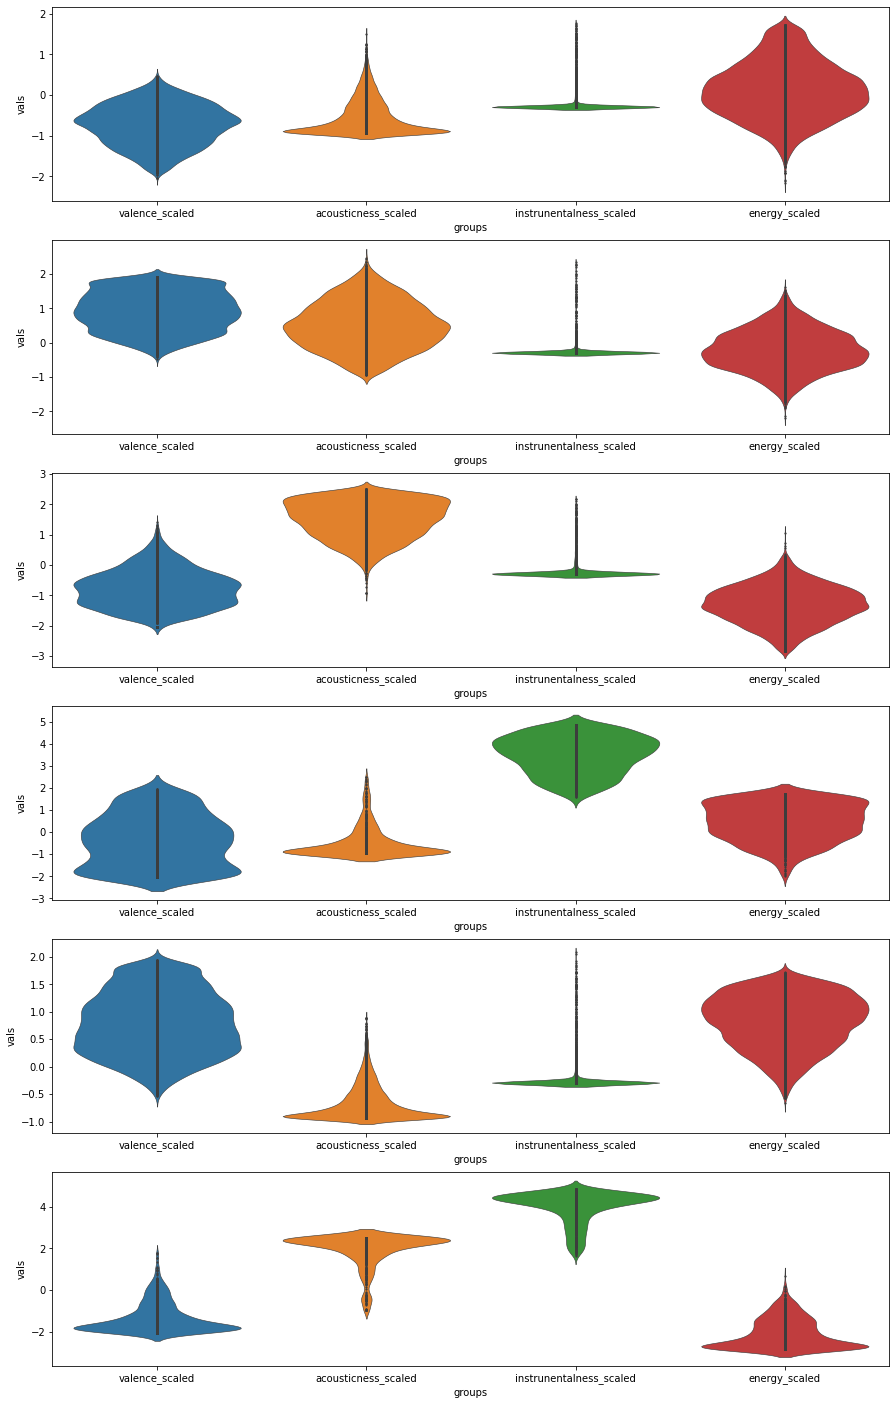

In [ ]:
f, axes = plt.subplots(6, 1,figsize=(15,25))

ax= sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
ax = sns.violinplot( data=c2 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[2])
ax = sns.violinplot( data=c3 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[3])
ax = sns.violinplot( data=c4 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[4])
ax = sns.violinplot( data=c5 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[5])

plt.show()


In [ ]:
display(df_songs_scaled['cluster'].value_counts())
minor_cluster = df_songs_scaled['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

0    7776
4    7639
1    4290
2    3884
5     767
3     742
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  742


In [ ]:
df_songs_joined = pd.concat([song_df,df_songs_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_songs_joined.loc[cluster, ['artists','name']].sample(frac=1).head(10))


,artists,name
cluster,,
0,['One Direction'],Half a Heart
0,['Coyote Theory'],This Side of Paradise
0,['Killstation'],Extinction
0,['Mayday'],突然好想你
0,['James Arthur'],Safe Inside
0,"['Calvin Harris', 'Ellie Goulding']",Outside (feat. Ellie Goulding)
0,Tom Zanetti,Didn't Know
0,"['JAY-Z', 'Kanye West']",Who Gon Stop Me
0,['Kane Brown'],For My Daughter


,artists,name
cluster,,
1,['Pilot'],Magic
1,['Mild High Club'],Note to Self
1,['El Gran Combo De Puerto Rico'],Brujeria
1,['Los Cafres'],Tus Ojos
1,['Walker Hayes'],You Broke Up with Me
1,['Rayland Baxter'],Willy's Song
1,"['DaBaby', 'Toosii']",Bidness (feat. Toosii)
1,['BTS'],Go Go
1,['Lorenzo Antonio'],Doce Rosas


,artists,name
cluster,,
2,['Britney Spears'],Everytime
2,['The Beatles'],If I Fell - Remastered 2009
2,['Café Tacvba'],Esa noche
2,"['SHRK', 'Shiloh Dynasty']",I'll Bite Your Soul
2,['Fra Lippo Lippi'],Later
2,"['Jeremih', 'Juicy J', 'Twista']",Woosah
2,['Bad Bunny'],Soy Peor
2,['Steve Tyrell'],This Guy's In Love With You
2,['Brent Faiyaz'],Rehab (Winter In Paris)


,artists,name
cluster,,
3,['Gentle Rain Makers'],Drip Drop Sleep
3,['Wp Sounds'],Rain Sounds Chill
3,"['Ocean Waves For Sleep', 'Ocean Sounds Collec...",Rolling Ocean Waves
3,"[""Martin O'Donnell"", 'Michael Salvatori']",Halo Theme Mjolnir Mix
3,['Lil Peep'],Problems
3,['girl in red'],i'll die anyway.
3,['Pretty Lights'],One Day They'll Know (ODESZA Remix)
3,['Silversun Pickups'],Lazy Eye
3,['Mac DeMarco'],My Kind of Woman


,artists,name
cluster,,
4,['Shakewell'],Leglock
4,"['Little Mix', 'Sean Paul']",Hair (feat. Sean Paul)
4,['Michael Jackson'],The Way You Make Me Feel - 2012 Remaster
4,['Rixton'],Hotel Ceiling
4,['BTS'],Jump
4,"[""Olivia O'Brien""]",NOW
4,['Rihanna'],Disturbia
4,"['Joachim Garraud', 'JD Davis', 'David Guetta']",The World Is Mine
4,['Parker McCollum'],Young Man's Blues


,artists,name
cluster,,
5,"[""Booker T. & the M.G.'s""]",Green Onions - 45 Version
5,['Yuki Sakura'],Stillness Speaks
5,['Chad Lawson'],It's the Most Wonderful Time of the Year
5,['Nicholas Hooper'],Dumbledore's Farewell
5,"['itssvd', 'Shiloh Dynasty']",Losing Interest
5,['Amy Soonyoung'],Christmas Time Is Here
5,['Outside HD Samples'],Calm Rain pt. 1
5,['Jóhann Jóhannsson'],The Theory of Everything
5,['Goldmund'],Threnody


In [ ]:
pca = PCA(n_components=3, random_state=0)
songs_pca = pca.fit_transform(songs_scaled)
pca.explained_variance_ratio_.sum()

0.9256176842717692

In [ ]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()


,C1,C2,C3,cluster
0,-0.402094,-0.593937,0.411752,1
1,-0.156576,-0.877729,0.553303,1
2,-0.833876,0.399055,-0.411283,0
3,-0.792420,-0.486189,0.510931,4
4,-1.025748,0.112934,-0.001132,4


In [ ]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=20)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()


1    742
0    742
4    742
2    742
3    742
5    742
Name: cluster, dtype: int64

In [ ]:
def clusters_view_using_pca(data_graph):
  sns.scatterplot(x='C1', y='C2', hue='cluster', data=data_graph, legend="full", palette='Paired')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.title('Visualização de clusters usando PCA')
  plt.show()


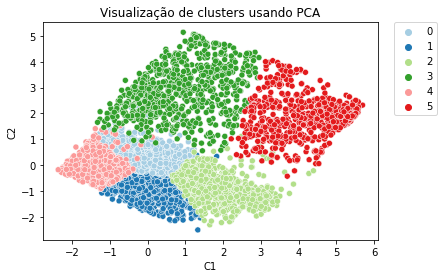

In [ ]:
clusters_view_using_pca(sampled_clusters_pca)


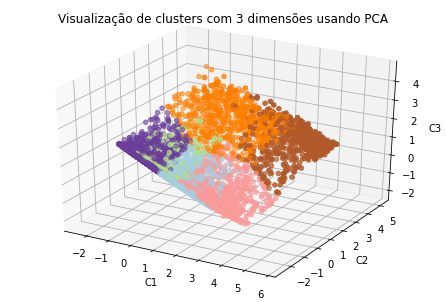

In [ ]:
fig = plt.figure()
fig.suptitle('Visualização de clusters com 3 dimensões usando PCA')
ax = Axes3D(fig)

ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.show()


In [ ]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
songs_tsne = tsne.fit_transform(songs_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
df_tsne = pd.DataFrame(songs_tsne, columns=['C1', 'C2'])
df_tsne['cluster'] = model.labels_
df_tsne.head()


,C1,C2,cluster
0,3.233320,-8.684857,1
1,17.285542,-15.650702,1
2,-36.679665,8.515388,0
3,-2.518474,-13.426304,4
4,-37.526173,-11.963792,4


In [ ]:
sampled_clusters_tsne = pd.DataFrame()

for c in df_tsne.cluster.unique():
    df_cluster_sampled_tsne = df_tsne[df_tsne.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_tsne = pd.concat([sampled_clusters_tsne,df_cluster_sampled_tsne], axis=0)
sampled_clusters_tsne.cluster.value_counts()

1    742
0    742
4    742
2    742
3    742
5    742
Name: cluster, dtype: int64

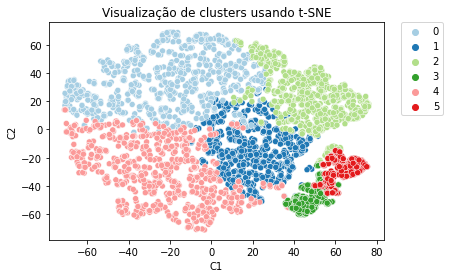

In [ ]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_tsne, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualização de clusters usando t-SNE')
plt.show()


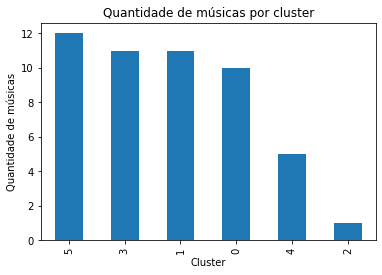

In [ ]:
df_playlist_scaled['cluster'] = model_playlist.labels_

df_playlist_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de músicas')
plt.title('Quantidade de músicas por cluster')
plt.show()


In [ ]:
songs_pca = pca.fit_transform(playlist_scaled)
pca.explained_variance_ratio_.sum()
df_playlist_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_playlist_pca['cluster'] = model_playlist.labels_
df_playlist_pca

,C1,C2,C3,cluster
0,-1.108003,0.259051,-0.025031,3
1,-1.241610,1.128123,-0.818162,3
2,0.972337,-0.285203,-1.394496,0
3,-1.249261,0.694124,0.137397,3
4,0.636010,0.041233,-0.971711,0
5,0.393321,0.304258,-1.359012,0
6,0.563662,0.639921,-0.536419,1
7,0.436597,-0.448780,0.417214,1
8,0.602593,-0.149773,-0.114321,1
9,-0.882765,0.085432,0.659124,5


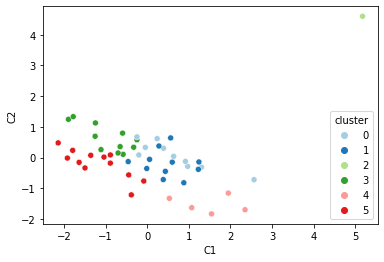

In [ ]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_playlist_pca, legend="full", palette='Paired')


In [ ]:

!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_playlist_scaled_f['playlist_track'] = 1

df_song_scaled_f['playlist_track'] = 0


In [ ]:
main_df = pd.concat([df_playlist_scaled_f, df_song_scaled_f], axis=0).reset_index(drop=True)

main_array = np.array(main_df.drop(['name', 'artists','playlist_track'], axis=1))

In [ ]:
k_means = KMeans(random_state=1, n_clusters=6) # default n_clusters = 8

k_means.fit(main_array)

predicted_clusters = k_means.fit_predict(main_array)


In [ ]:
print(predicted_clusters)


[0 2 2 ... 0 2 0]


In [ ]:
pred_series = pd.Series(predicted_clusters)
main_df_w_pred = pd.concat([main_df, pred_series], axis=1)
main_df_w_pred.rename(columns={0:'cluster'},inplace=True)


In [ ]:

main_df_w_pred.cluster.unique()


array([0, 2, 4, 1, 3, 5], dtype=int32)

In [ ]:

relevant_clusters = main_df_w_pred['cluster'][main_df_w_pred.playlist_track==1]


pred_df = main_df_w_pred.drop(main_df_w_pred[main_df_w_pred.playlist_track==1].index)


In [ ]:
pred_df


,valence_scaled,acousticness_scaled,instrunentalness_scaled,energy_scaled,name,artists,playlist_track,cluster
50,0.726824,0.221390,-0.296058,0.193130,good 4 u,Olivia Rodrigo,0,4
51,1.008697,0.089662,-0.296058,-0.518879,MONTERO (Call Me By Your Name),Lil Nas X,0,4
52,-0.098661,-0.892400,-0.277865,0.439595,Down,MOMO Soundz,0,2
53,0.944268,-0.125261,-0.295243,0.362004,Kiss Me More (feat. SZA),Doja Cat,0,0
54,0.328175,-0.499644,-0.296058,0.813856,Beggin',Måneskin,0,0
...,...,...,...,...,...,...,...,...
25143,0.404683,-0.646624,-0.294568,0.850369,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0,0
25144,0.912054,-0.225790,-0.296058,0.599340,Halloweenie III: Seven Days,['Ashnikko'],0,0
25145,0.521459,-0.589774,-0.296014,1.078577,AYA,['MAMAMOO'],0,0
25146,-1.258366,-0.905295,-0.296019,0.006000,Darkness,['Eminem'],0,2


In [ ]:
relevant_clusters

0     0
1     2
2     2
3     0
4     2
5     2
6     2
7     4
8     2
9     0
10    4
11    2
12    2
13    1
14    4
15    4
16    0
17    2
18    2
19    4
20    2
21    1
22    0
23    2
24    4
25    1
26    0
27    2
28    0
29    2
30    0
31    0
32    1
33    0
34    1
35    3
36    4
37    1
38    1
39    2
40    4
41    0
42    1
43    0
44    1
45    0
46    2
47    4
48    0
49    0
Name: cluster, dtype: int32

##Retorna uma playlist similar:

In [ ]:

recs=[]
for k in relevant_clusters:
    recs +=pred_df[['name', 'artists']][pred_df.cluster==k].sample(1).values.tolist()
    pred_df.drop(pred_df[['name', 'artists']][pred_df.cluster==k].sample(1).index,inplace=True)

print(' similar to your playlist:\n')
for song in recs:
    print(song[0]+', by '+ song[1])

 similar to your playlist:

Feel So Close - Radio Edit, by ['Calvin Harris']
Wild (feat. Gary Clark Jr.), by ['John Legend', 'Gary Clark Jr.']
human, by ['Christina Perri']
Tints (feat. Kendrick Lamar), by ['Anderson .Paak', 'Kendrick Lamar']
Monophobia, by ['deadmau5', 'Rob Swire']
Otra Noche en Miami, by ['Bad Bunny']
Young Wheezy (with Gunna), by ['NAV', 'Gunna']
Let Me Blow Ya Mind, by ['Eve', 'Gwen Stefani']
Make It Bun Dem, by ['Skrillex', 'Damian Marley']
La Difícil, by ['Bad Bunny']
Eres, by ['Grupo Niche']
Somebody To Love, by ['OneRepublic']
I Get Lonely, by ['Janet Jackson']
Santa Baby, by ['Michael Bublé']
Kamikaze, by ['Lil Mosey']
Seni Her Gördüğümde, by ['Erkin Koray']
Hell Right (feat. Trace Adkins), by ['Blake Shelton', 'Trace Adkins']
sex (catching feelings), by ['EDEN']
What If, by ['Coldplay']
Jingle Bells (feat. The Puppini Sisters), by ['Michael Bublé', 'The Puppini Sisters']
I'm Just Snacking, by ['Gus Dapperton']
Crazy He Calls Me, by ['Billie Holiday']
What the

##Resultados

Conforme visto, foi possível gerar uma playlist recomendada apartir dos 
resultados obtidos pela analise feita da base de dados existente, ficando assim como possíveis trabalhos futuros aumentar a precisão do algoritimo de recomendação e o tamanho da base de dados utilizada atualmente.